In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import xarray as xr
import pandas as pd
#from wcmatch.pathlib import Path # Handling of path object
from glob import glob
from plotnine import *
from matplotlib import pyplot as plt
import os
from netCDF4 import Dataset as netcdf_dataset
import math as m
from wcmatch.pathlib import Path # Handling of path object

## redo NBSS figure with different colors

In [2]:
path_to_datafile=(Path('/work/m1c/PSSdb_data_ver1/').expanduser())
path_files_1a=list(path_to_datafile.glob('*_1a_*.csv'))
df_1a = pd.concat(map(lambda path: pd.read_table(path,sep=',').assign(Instrument=path.name[0:path.name.find('_')]),path_files_1a)).drop_duplicates().reset_index(drop=True)
grouping = ['year', 'month', 'latitude', 'longitude', 'Instrument']
df_1a = pd.merge(df_1a, df_1a.drop_duplicates(subset=grouping, ignore_index=True)[grouping].reset_index().rename({'index': 'Group_index'}, axis='columns'), how='left', on=grouping)

#df_1a['normalized_biovolume_mean'] = (df_1a.normalized_biovolume_mean/0.001)*df_1a.max_depth# conversion to meters squared

In [3]:
df_1a

,year,month,latitude,longitude,ocean,min_depth,max_depth,n,biovolume_size_class,normalized_biovolume_mean,normalized_biovolume_std,equivalent_circular_diameter_mean,normalized_abundance_mean,normalized_abundance_std,QC_3std_dev,QC_min_n_size_bins,QC_R2,Instrument,Group_index
0,2013,5,48.5,-5.5,North Atlantic Ocean,1.5,1.5,2,2.010620e+02,45775.072711,45091.674830,7.1750,20547.797715,19991.609640,0,0,0,IFCB,0
1,2013,5,48.5,-5.5,North Atlantic Ocean,1.5,1.5,2,4.021240e+02,18372.615799,12377.243030,9.0395,9014.829030,6586.556175,0,0,0,IFCB,0
2,2013,5,48.5,-5.5,North Atlantic Ocean,1.5,1.5,2,8.042475e+02,4358.863288,2992.116522,11.3890,1841.660885,1198.897654,0,0,0,IFCB,0
3,2013,5,48.5,-5.5,North Atlantic Ocean,1.5,1.5,2,1.608495e+03,4633.154085,3892.659782,14.3495,1718.678968,1473.658198,0,0,0,IFCB,0
4,2013,5,48.5,-5.5,North Atlantic Ocean,1.5,1.5,2,3.216991e+03,3591.126120,3581.472827,18.0795,1303.096511,1275.823910,0,0,0,IFCB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34273,2021,5,49.5,-15.5,North Atlantic Ocean,4.0,201.0,8,1.349304e+10,0.060212,0.085067,2915.6575,0.004081,0.005680,0,0,0,UVP,2976
34274,2021,5,49.5,-15.5,North Atlantic Ocean,4.0,201.0,7,2.698608e+10,0.023321,0.036606,3673.4985,0.001297,0.002207,0,0,0,UVP,2976
34275,2021,5,49.5,-15.5,North Atlantic Ocean,4.0,201.0,5,5.397215e+10,0.009819,0.012614,4628.3185,0.000569,0.000734,0,0,0,UVP,2976
34276,2021,5,49.5,-15.5,North Atlantic Ocean,4.0,201.0,2,1.079443e+11,0.004920,0.001995,5831.3160,0.000184,0.000168,0,0,0,UVP,2976


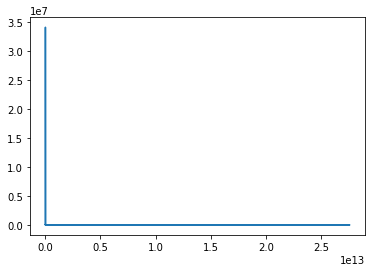

In [4]:
plt.plot(df_1a.biovolume_size_class, df_1a.normalized_biovolume_mean)

In [5]:
np.nanmax(df_1a.normalized_biovolume_mean)

34169240.366636

In [6]:
colors = { 'Scanner': 'lightslategray', 'UVP': 'blue','IFCB': 'green'}

In [7]:
theme_paper=theme(axis_ticks_direction="inout",
              panel_grid=element_blank(),
              axis_line = element_line(colour = "black"),
              panel_background=element_rect(fill='white'),
              panel_border=element_blank(),
              legend_title=element_text(family="serif", size=15),
              legend_position='none',#legend_position='top',
              legend_text=element_text(family="serif", size=15),
              axis_title=element_text(family="serif", size=15),
              axis_text_x=element_text(family="serif", size=15),
              axis_text_y=element_text(family="serif", size=15, rotation=90),
              plot_background=element_rect(fill='white'), strip_background=element_rect(fill='white'))

In [8]:
#breaks=[size  for size in np.sort( np.concatenate(np.arange(1, 10).reshape((9, 1)) * np.power(10, np.arange(1, 5, 1))))]
breaks = [2, 20, 200, 2000, 20000]
breaks

[2, 20, 200, 2000, 20000]

In [9]:
#labels=[size if (size / np.power(10, np.ceil(np.log10(size)))) == 1 else '' for size in np.sort( np.concatenate(np.arange(1, 10).reshape((9, 1)) * np.power(10, np.arange(1, 5, 1))))]
labels = [2, 20, 200, 2000, 20000]
labels

[2, 20, 200, 2000, 20000]

In [10]:
plot = (ggplot(data=df_1a)+
        geom_line(df_1a,aes(x='equivalent_circular_diameter_mean', y='normalized_biovolume_mean', color='Instrument',group='Group_index'), alpha=0.02, size = 0.1) +
        geom_point(aes(x='equivalent_circular_diameter_mean', y='normalized_biovolume_mean', color='Instrument'),size = 0.05, alpha=0.01, shape = 'o')+
        stat_summary(data=df_1a[df_1a.groupby(['Instrument']).equivalent_circular_diameter_mean.transform(lambda x: x.astype(str).isin(pd.Series(x.value_counts(normalize=True)[x.value_counts(normalize=True)>=np.quantile(x.value_counts(normalize=True),0.5)].index).astype(str)))],mapping=aes(x='equivalent_circular_diameter_mean', y='normalized_biovolume_mean', color='Instrument'),geom='line', fun_y=np.nanmedian, size = 1)+
        labs(y=r'Normalized Biovolume ($\mu$m$^{3}$ L$^{-1}$ $\mu$m$^{-3}$)', x=r'Equivalent circular diameter ($\mu$m)')+
        scale_color_manual(values = colors)+
        #scale_y_log10(breaks=[10**np.arange(-6,8,step=2, dtype=np.float)][0],labels=['10$^{%s}$'% int(n) for n in np.arange(-6,8,step=2)] , limits=(1e-6, 1e8))+ axis for L
        scale_y_log10(breaks=[10**np.arange(-2,14,step=2, dtype=np.float)][0],labels=['10$^{%s}$'% int(n) for n in np.arange(-1,11,step=2)] , limits=(1e-1, 1e11))+# axis for m2
        scale_x_log10(breaks=breaks, labels=labels, limits=(2, 35000))+
        #scale_x_log10(breaks=[size  for size in np.sort( np.concatenate(np.arange(1, 10).reshape((9, 1)) * np.power(10, np.arange(1, 5, 1))))],labels= [size if (size / np.power(10, np.ceil(np.log10(size)))) == 1 else '' for size in np.sort( np.concatenate(np.arange(1, 10).reshape((9, 1)) * np.power(10, np.arange(1, 5, 1))))], limits=(1, 15000))+
        theme_paper).draw(show=False)
plot.set_size_inches(6,6)
plot.savefig(fname='{}/work/CMIP6_size_spectra_scripts/plots/NBSS_instruments_Liters.pdf'.format(str(Path.home())), dpi=300)

PlotnineError: 'Breaks and labels have unequal lengths'

## load PSSdb dataset, only for UVP and Scanners

In [40]:
PSSdb_1b_files = glob('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/*1b*.csv')
PSSdb_1b_files = [x for x in PSSdb_1b_files if 'IFCB' not in x]

PSSdb_1a_files = glob('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/*1a*.csv')
PSSdb_1a_files = [x for x in PSSdb_1a_files if 'IFCB' not in x]

In [41]:
PSSdb_1a_files

['/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/UVP_1a_Size-distribution_v2024-04.csv',
 '/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/Scanner_1a_Size-distribution_v2024-04.csv']

In [42]:
df=pd.concat(map((lambda path: (pd.read_csv(path))), PSSdb_1b_files)).reset_index(drop=True)
df_1a=pd.concat(map((lambda path: (pd.read_csv(path))), PSSdb_1a_files)).reset_index(drop=True)

## integrate intercept and biovolume values, so they match units from model data (from Liters to m^2)

In [43]:
#get rid of log scale, convert liters to cubic meters, integrate by depth, and transform back to log
df['intercept_m2'] = np.log10(((10**df.NBSS_intercept_mean)/0.001)*df.max_depth)#df.max_depth


In [44]:
df_1a

,year,month,latitude,longitude,ocean,min_depth,max_depth,n,biovolume_size_class,normalized_biovolume_mean,normalized_biovolume_std,equivalent_circular_diameter_mean,normalized_abundance_mean,normalized_abundance_std,QC_3std_dev,QC_min_n_size_bins,QC_R2,Unnamed: 17
0,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,5.271000e+07,6.325000,NaN,459.2,0.751700,NaN,0,0,0,NaN
1,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,1.054000e+08,4.984000,NaN,578.5,0.591800,NaN,0,0,0,NaN
2,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,2.108000e+08,3.178000,NaN,728.9,0.334100,NaN,0,0,0,NaN
3,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,4.217000e+08,1.729000,NaN,918.4,0.162900,NaN,0,0,0,NaN
4,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,8.433000e+08,0.225600,NaN,1157.0,0.025200,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,2022,5,0.5,-43.5,North Atlantic Ocean,0.0,200.0,1,6.747000e+09,0.003647,NaN,2314.0,0.000266,NaN,0,0,0,NaN
21765,2022,5,0.5,-43.5,North Atlantic Ocean,0.0,200.0,1,1.349000e+10,0.001079,NaN,2916.0,0.000072,NaN,0,0,0,NaN
21766,2022,5,0.5,-43.5,North Atlantic Ocean,0.0,200.0,1,2.699000e+10,0.000437,NaN,3673.0,0.000026,NaN,0,0,0,NaN
21767,2022,5,0.5,-43.5,North Atlantic Ocean,0.0,200.0,1,5.397000e+10,0.000297,NaN,4628.0,0.000017,NaN,0,0,0,NaN


In [45]:
df

,year,month,latitude,longitude,ocean,min_depth,max_depth,n,NBSS_slope_mean,NBSS_intercept_mean,...,PSD_intercept_mean,PSD_r2_mean,PSD_slope_std,PSD_intercept_std,PSD_r2_std,QC_3std_dev,QC_min_n_size_bins,QC_R2,Unnamed: 23,intercept_m2
0,1996,5,43.5,7.5,Mediterranean Region,0.0,60.0,1,-2.127,16.670,...,17.010,0.8020,NaN,NaN,NaN,1,0,1,NaN,21.448151
1,1996,8,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.395,10.060,...,9.812,0.9469,NaN,NaN,NaN,0,0,0,NaN,14.838151
2,1996,9,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.204,8.608,...,8.630,0.9152,NaN,NaN,NaN,0,1,0,NaN,13.386151
3,1996,12,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.161,7.770,...,7.592,0.9656,NaN,NaN,NaN,0,0,0,NaN,12.548151
4,1997,1,43.5,7.5,Mediterranean Region,0.0,60.0,2,-1.154,8.286,...,8.185,0.9495,0.3851,1.5510,0.03598,0,0,0,NaN,13.064151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,2,43.5,7.5,Mediterranean Region,17.0,201.0,10,-1.596,12.590,...,12.870,0.9469,0.5811,1.5430,0.04545,0,0,0,NaN,17.893196
1802,2021,5,48.5,-14.5,North Atlantic Ocean,2.0,201.0,4,-1.094,9.651,...,9.882,0.9599,0.0951,0.2454,0.02386,0,0,0,NaN,14.954196
1803,2021,5,48.5,-15.5,North Atlantic Ocean,4.0,201.0,4,-1.110,9.793,...,10.060,0.9659,0.3586,1.0340,0.01287,0,0,0,NaN,15.096196
1804,2021,5,49.5,-14.5,North Atlantic Ocean,2.0,201.0,8,-1.073,9.430,...,9.628,0.9645,0.1954,0.5182,0.01372,0,0,0,NaN,14.733196


In [46]:
np.min(df_1a.biovolume_size_class)

823500.0

In [47]:
print((((np.min(df_1a.biovolume_size_class)*6)/m.pi)**(1./3.)))

116.29338013672985


In [48]:
np.max(df_1a.biovolume_size_class)

27630000000000.0

In [49]:
print((((np.max(df_1a.biovolume_size_class)*6)/m.pi)**(1./3.)))

37508.303448748884


In [11]:
df

,year,month,latitude,longitude,ocean,min_depth,max_depth,n,NBSS_slope_mean,NBSS_intercept_mean,...,PSD_intercept_mean,PSD_r2_mean,PSD_slope_std,PSD_intercept_std,PSD_r2_std,QC_3std_dev,QC_min_n_size_bins,QC_R2,Unnamed: 23,intercept_m2
0,1996,5,43.5,7.5,Mediterranean Region,0.0,60.0,1,-2.127,16.670,...,17.010,0.8020,NaN,NaN,NaN,1,0,1,NaN,21.448151
1,1996,8,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.395,10.060,...,9.812,0.9469,NaN,NaN,NaN,0,0,0,NaN,14.838151
2,1996,9,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.204,8.608,...,8.630,0.9152,NaN,NaN,NaN,0,1,0,NaN,13.386151
3,1996,12,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.161,7.770,...,7.592,0.9656,NaN,NaN,NaN,0,0,0,NaN,12.548151
4,1997,1,43.5,7.5,Mediterranean Region,0.0,60.0,2,-1.154,8.286,...,8.185,0.9495,0.3851,1.5510,0.03598,0,0,0,NaN,13.064151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,2,43.5,7.5,Mediterranean Region,17.0,201.0,10,-1.596,12.590,...,12.870,0.9469,0.5811,1.5430,0.04545,0,0,0,NaN,17.893196
1802,2021,5,48.5,-14.5,North Atlantic Ocean,2.0,201.0,4,-1.094,9.651,...,9.882,0.9599,0.0951,0.2454,0.02386,0,0,0,NaN,14.954196
1803,2021,5,48.5,-15.5,North Atlantic Ocean,4.0,201.0,4,-1.110,9.793,...,10.060,0.9659,0.3586,1.0340,0.01287,0,0,0,NaN,15.096196
1804,2021,5,49.5,-14.5,North Atlantic Ocean,2.0,201.0,8,-1.073,9.430,...,9.628,0.9645,0.1954,0.5182,0.01372,0,0,0,NaN,14.733196


## modify variables to match format from OBGCMs

In [50]:
df['month']= df['month'].astype(str).str.zfill(2)
df['year']= df['year'].astype(str)
df['time'] = df.year+df.month
df['time']= pd.to_datetime(df['time'], format = '%Y%m')
df.rename(columns={'latitude':'lat', 'longitude':'lon'}, inplace=True)

In [51]:
len(df)

1806

In [52]:
np.mean(df.NBSS_slope_mean)

-1.0721057032115173

In [53]:
np.min(df.NBSS_slope_mean)

-2.209

In [54]:
np.max(df.NBSS_slope_mean)

0.0591

In [18]:
10**(np.mean(df.intercept_m2))

38816490623032.414

In [56]:
10**(np.min(df.intercept_m2))

14.658976551654266

In [58]:
10**(np.max(df.intercept_m2))

1.489630114568738e+25

In [26]:
np.mean(df.NBSS_r2_mean)

0.9545465116279069

In [27]:
np.min(df.NBSS_r2_mean)

0.4467

In [28]:
np.max(df.NBSS_r2_mean)

0.9977

In [59]:
pssdb_mean=df.astype(dict(zip(['lat','lon'],[str]*2))).groupby(['lat', 'lon', 'time']).apply(lambda x: pd.Series({'betas_hist':np.nanmean(x.NBSS_slope_mean), 'intercept_hist':np.nanmean(x.intercept_m2),'R2_hist':np.nanmean(x.NBSS_r2_mean)})).reset_index().rename(columns={"latitude": "lat", "longitude": "lon"})
pssdb_mean = pssdb_mean.astype(dict(zip(['lat','lon'],[float]*2)))
len(pssdb_mean)

1630

In [60]:
pssdb_mean

,lat,lon,time,betas_hist,intercept_hist,R2_hist
0,-0.5,-0.5,2019-09-01,-1.2200,14.840196,0.9821
1,-0.5,-150.5,2015-04-01,-1.1560,14.472196,0.9667
2,-0.5,-151.5,2015-04-01,-1.1430,14.409196,0.9751
3,-0.5,-153.5,2011-09-01,-1.4020,16.873196,0.9836
4,-0.5,-17.5,2019-10-01,-1.3600,15.863196,0.9818
...,...,...,...,...,...,...
1625,9.5,-25.5,2014-04-01,-0.8705,12.225196,0.9876
1626,9.5,-28.5,2015-05-01,-1.0190,13.745196,0.9512
1627,9.5,-35.5,2015-05-01,-1.0870,13.954196,0.9851
1628,9.5,-40.5,2015-05-01,-1.0980,14.019196,0.9701


## Use integration to get total biomass from linear regression

In [25]:
#import sympy as sy
#def integrate(NBSS_slope_mean, NBSS_intercept_mean, min_size, max_size):
    #def f(x): 
        #return (10**(NBSS_intercept_mean))*(x**NBSS_slope_mean)  
  
    #x = sy.Symbol("x") 
    #print(sy.integrate(f(x), (x, min_size, max_size)))
    #return (sy.integrate(f(x), (x, min_size, max_size)))

In [26]:
#test = integrate(-1.157, 8.310, 2, 35000)

In [27]:
#df['total_biovolume'] = df.apply(lambda x: integrate(x.NBSS_slope_mean, x.NBSS_intercept_mean, np.min(df_1a.biovolume_size_class), np.max(df_1a.biovolume_size_class)), axis=1) # integrating from the min and max size class in PSSdb from UVP and Zooscan

## alternative (and perhaps more appropiate) use all variables from PSSdb to summ the biovolumes for the UVP and Zooscan range

In [61]:
PSSdb_full_files = glob('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/*all_var*.csv')
PSSdb_full_files = [x for x in PSSdb_full_files if 'IFCB' not in x]
df_full=pd.concat(map((lambda path: (pd.read_csv(path))), PSSdb_full_files)).reset_index(drop=True)
#convert liters to cubic meters, integrate biovolume by depth
df_full['biovolume_m2'] = (df_full.Biovolume_mean/0.001)*df_full.Max_obs_depth#df.max_depth

df_full=df_full.astype(dict(zip(['midLatBin','midLonBin'],[str]*2))).groupby(['midLatBin', 'midLonBin', 'date_bin']).apply(lambda x: pd.Series({'total_biovolume':np.sum(x.biovolume_m2)})).reset_index()
df_full = df_full.astype(dict(zip(['midLatBin','midLonBin'],[float]*2)))

df_full.head()

,midLatBin,midLonBin,date_bin,total_biovolume
0,-0.25,-0.25,2019_09_wk39,9.228018e+15
1,-0.25,-150.75,2015_04_wk16,1.034154e+16
2,-0.25,-151.25,2015_04_wk16,1.018038e+16
3,-0.25,-153.75,2011_09_wk36,1.064265e+16
4,-0.25,-17.25,2019_10_wk40,2.495337e+15


In [62]:
lat_increments = np.arange(np.floor(min(df_full.midLatBin) - 1),
                               np.ceil(max(df_full.midLatBin) + 1), 1)
df_full['midLatBin'] = pd.cut(x=df_full['midLatBin'], bins=lat_increments, include_lowest=True)
df_full['midLatBin'] = df_full['midLatBin'].apply(lambda x:x.mid).astype(float)



lon_increments = np.arange(np.floor(min(df_full.midLonBin) - 1),
                               np.ceil(max(df_full.midLonBin) + 1), 1)
df_full['midLonBin'] = pd.cut(x=df_full['midLonBin'], bins=lon_increments, include_lowest=True)
df_full['midLonBin'] = df_full['midLonBin'].apply(lambda x:x.mid).astype(float)


df_full['year'] = df_full['date_bin'].apply(lambda x:x.split('_')[0])
df_full['month'] = df_full['date_bin'].apply(lambda x:x.split('_')[1])
df_full['time'] = df_full.year+df_full.month
df_full['time']= pd.to_datetime(df_full['time'], format = '%Y%m')
df_full.rename(columns={'midLatBin':'lat', 'midLonBin':'lon'}, inplace=True)
df_full.head()

,lat,lon,date_bin,total_biovolume,year,month,time
0,-0.5,-0.5,2019_09_wk39,9.228018e+15,2019,09,2019-09-01
1,-0.5,-150.5,2015_04_wk16,1.034154e+16,2015,04,2015-04-01
2,-0.5,-151.5,2015_04_wk16,1.018038e+16,2015,04,2015-04-01
3,-0.5,-153.5,2011_09_wk36,1.064265e+16,2011,09,2011-09-01
4,-0.5,-17.5,2019_10_wk40,2.495337e+15,2019,10,2019-10-01


In [63]:
df_full=df_full.astype(dict(zip(['lat','lon'],[str]*2))).groupby(['lat', 'lon', 'time']).apply(lambda x: pd.Series({'total_biovolume':np.mean(x.total_biovolume)})).reset_index()
df_full = df_full.astype(dict(zip(['lat','lon'],[float]*2)))
len(df_full)

1630

In [37]:
np.min(df_full.total_biovolume)

20359701797560.02

In [38]:
np.max(df_full.total_biovolume)

1.0155444259234976e+19

In [39]:
np.mean(df_full.total_biovolume)

8.661358555297322e+16

## merge biovolume data with 1b products

In [64]:
pssdb_mean = pd.merge(pssdb_mean, df_full, on=['lat','lon', 'time'])
pssdb_mean

,lat,lon,time,betas_hist,intercept_hist,R2_hist,total_biovolume
0,-0.5,-0.5,2019-09-01,-1.2200,14.840196,0.9821,9.228018e+15
1,-0.5,-150.5,2015-04-01,-1.1560,14.472196,0.9667,3.222041e+16
2,-0.5,-151.5,2015-04-01,-1.1430,14.409196,0.9751,1.541309e+16
3,-0.5,-153.5,2011-09-01,-1.4020,16.873196,0.9836,6.590981e+15
4,-0.5,-17.5,2019-10-01,-1.3600,15.863196,0.9818,2.434160e+15
...,...,...,...,...,...,...,...
1625,9.5,-25.5,2014-04-01,-0.8705,12.225196,0.9876,1.009297e+16
1626,9.5,-28.5,2015-05-01,-1.0190,13.745196,0.9512,1.016288e+16
1627,9.5,-35.5,2015-05-01,-1.0870,13.954196,0.9851,5.172112e+15
1628,9.5,-40.5,2015-05-01,-1.0980,14.019196,0.9701,6.471689e+15


## convert PSSdb to xarray so that we can make the conversion of times to seasons

In [65]:
ds_pssdb = pssdb_mean.set_index(['lat', 'lon', 'time']).to_xarray()
ds_pssdb = ds_pssdb.groupby('time.month').mean(dim='time')


In [66]:
ds_pssdb

<xarray.Dataset>
Dimensions:          (lat: 126, lon: 251, month: 12)
Coordinates:
  * lat              (lat) float64 -64.5 -63.5 -62.5 -60.5 ... 78.5 79.5 80.5
  * lon              (lon) float64 -179.5 -178.5 -177.5 ... 175.5 176.5 178.5
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    betas_hist       (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    intercept_hist   (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    R2_hist          (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    total_biovolume  (month, lat, lon) float64 nan nan nan nan ... nan nan nan

In [67]:
for var in [ 'betas_hist', 'intercept_hist', 'R2_hist', 'total_biovolume']: # biomass arrays here 
    SH_subset = ds_pssdb[var].where(ds_pssdb.lat < 0,drop=True).values # selecting southern hemisphere
    SH_subset = np.roll(SH_subset, shift=6, axis=0) #shift the season occurence by six months (only southern hemispher)
    full_field = ds_pssdb[var].values #select biomass values for each of the phytoplankton groups
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset # from full_field biomass subset, select all months (1st dim), 
    #latitudes from 0 to the lenght of southen hemisphere subset (dim2) and all longitudes
    svar = var #+ '_shift' # 
    ds_pssdb[svar] = xr.DataArray(full_field, dims=ds_pssdb[var].dims, coords=ds_pssdb[var].coords)

In [68]:
ds_pssdb

<xarray.Dataset>
Dimensions:          (lat: 126, lon: 251, month: 12)
Coordinates:
  * lat              (lat) float64 -64.5 -63.5 -62.5 -60.5 ... 78.5 79.5 80.5
  * lon              (lon) float64 -179.5 -178.5 -177.5 ... 175.5 176.5 178.5
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    betas_hist       (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    intercept_hist   (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    R2_hist          (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    total_biovolume  (month, lat, lon) float64 nan nan nan nan ... nan nan nan

## merge PSSdb and biome datasets

In [69]:
pssdb_mean = ds_pssdb.to_dataframe().reset_index()
pssdb_mean

,lat,lon,month,betas_hist,intercept_hist,R2_hist,total_biovolume
0,-64.5,-179.5,1,NaN,NaN,NaN,NaN
1,-64.5,-179.5,2,NaN,NaN,NaN,NaN
2,-64.5,-179.5,3,NaN,NaN,NaN,NaN
3,-64.5,-179.5,4,NaN,NaN,NaN,NaN
4,-64.5,-179.5,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
379507,80.5,178.5,8,NaN,NaN,NaN,NaN
379508,80.5,178.5,9,NaN,NaN,NaN,NaN
379509,80.5,178.5,10,NaN,NaN,NaN,NaN
379510,80.5,178.5,11,NaN,NaN,NaN,NaN


In [70]:
pssdb_mean=pssdb_mean.set_index(['lat', 'lon'])
pssdb_mean

month  betas_hist  intercept_hist  R2_hist  total_biovolume
lat   lon                                                                
-64.5 -179.5      1         NaN             NaN      NaN              NaN
      -179.5      2         NaN             NaN      NaN              NaN
      -179.5      3         NaN             NaN      NaN              NaN
      -179.5      4         NaN             NaN      NaN              NaN
      -179.5      5         NaN             NaN      NaN              NaN
...             ...         ...             ...      ...              ...
 80.5  178.5      8         NaN             NaN      NaN              NaN
       178.5      9         NaN             NaN      NaN              NaN
       178.5     10         NaN             NaN      NaN              NaN
       178.5     11         NaN             NaN      NaN              NaN
       178.5     12         NaN             NaN      NaN              NaN

[379512 rows x 5 columns]

In [71]:
biomes_obs= xr.open_mfdataset('/work/jyl/validation_data/MLD_and_biomes/data_biomes_x1.nc')
biomes_mask = ~np.isnan(biomes_obs.biomes)
biomes_obs['biomes'] = biomes_obs['biomes'].where((biomes_obs['lat'] < 44.5) & (biomes_obs['lat'] > -44.5), 2)
biomes_obs = biomes_obs.where(biomes_mask)
biomes_obs.biomes.plot()

OSError: no files to open

In [41]:
biomes_obs

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    biomes   (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

In [42]:
#biomes_obs['betas_obs'] = (('month', 'lat', 'lon'), ds_pssdb.betas_hist.data)

In [43]:
biomes_obs = biomes_obs.to_dataframe()


#common_idx = biomes_obs.index.intersection(pssdb_mean.index)
#biomes_obs = biomes_obs.loc[common_idx]
#df_yield = df_yield.loc[common_idx]

In [44]:
biomes_obs=biomes_obs.reset_index()
biomes_obs

,lat,lon,biomes
0,89.5,-179.5,NaN
1,89.5,-178.5,NaN
2,89.5,-177.5,NaN
3,89.5,-176.5,NaN
4,89.5,-175.5,NaN
...,...,...,...
64795,-89.5,175.5,NaN
64796,-89.5,176.5,NaN
64797,-89.5,177.5,NaN
64798,-89.5,178.5,NaN


In [45]:
pssdb_biomes = pd.merge(biomes_obs, pssdb_mean, how='left', on= ['lat', 'lon']).reset_index(drop =True)
pssdb_biomes = pssdb_biomes[(pssdb_biomes['betas_hist'].notna()) & (pssdb_biomes['biomes'].notna())].reset_index(drop =True) # check about assigning nearest data 

In [46]:
pssdb_biomes

,lat,lon,biomes,month,betas_hist,intercept_hist,R2_hist,total_biovolume
0,80.5,69.5,2.0,8.0,-0.711575,10.534620,0.947649,4.722871e+10
1,79.5,60.5,2.0,8.0,-1.013523,13.588307,0.966109,8.472178e+11
2,79.5,66.5,2.0,7.0,-0.727859,11.050427,0.865061,3.418501e+12
3,79.5,69.5,2.0,8.0,-0.829441,12.244878,0.983299,8.727823e+11
4,79.5,71.5,2.0,7.0,-0.684871,10.891841,0.950746,1.007926e+12
...,...,...,...,...,...,...,...,...
1212,-57.5,-67.5,2.0,7.0,-0.581804,9.593633,0.903101,5.871333e+09
1213,-60.5,-60.5,2.0,7.0,-1.014763,13.386958,0.943349,1.310059e+12
1214,-62.5,-49.5,2.0,7.0,-0.643737,7.889982,0.979019,1.951527e+11
1215,-64.5,-53.5,2.0,7.0,-0.728118,11.329221,0.945405,4.007348e+11


In [47]:
# assign string with seasons
pssdb_biomes['month'] = pssdb_biomes['month'].astype(str)#.str.zfill(2)
def assign_seasons(month):
    if month in ['12.0', '1.0', '2.0']:
        return 'Winter'
    elif month in ['3.0', '4.0', '5.0']:
        return 'Spring'
    elif month in ['6.0', '7.0', '8.0']:
        return 'Summer'
    elif month in ['9.0', '10.0', '11.0']:
        return 'Fall'
pssdb_biomes['season'] = pssdb_biomes['month'].apply(assign_seasons)
pssdb_biomes.rename(columns={'betas_hist':'slope', 'intercept_hist':'intercept', 'R2_hist':'R2'}, inplace=True)
pssdb_biomes['biomes']=pssdb_biomes['biomes'].astype(str)
pssdb_biomes = pssdb_biomes.replace({'biomes':{'1.0':'LC','2.0':'HCSS','3.0':'HCPS'}})
pssdb_biomes['experiment'] = 'obs'
pssdb_biomes['source'] = 'PSSdb'

In [48]:
pssdb_biomes.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [49]:
pssdb_biomes

,lat,lon,biomes,month,slope,intercept,R2,total_biovolume,season,experiment,source
0,80.5,69.5,HCSS,8.0,-0.711575,10.534620,0.947649,4.722871e+10,Summer,obs,PSSdb
1,79.5,60.5,HCSS,8.0,-1.013523,13.588307,0.966109,8.472178e+11,Summer,obs,PSSdb
2,79.5,66.5,HCSS,7.0,-0.727859,11.050427,0.865061,3.418501e+12,Summer,obs,PSSdb
3,79.5,69.5,HCSS,8.0,-0.829441,12.244878,0.983299,8.727823e+11,Summer,obs,PSSdb
4,79.5,71.5,HCSS,7.0,-0.684871,10.891841,0.950746,1.007926e+12,Summer,obs,PSSdb
...,...,...,...,...,...,...,...,...,...,...,...
1212,-57.5,-67.5,HCSS,7.0,-0.581804,9.593633,0.903101,5.871333e+09,Summer,obs,PSSdb
1213,-60.5,-60.5,HCSS,7.0,-1.014763,13.386958,0.943349,1.310059e+12,Summer,obs,PSSdb
1214,-62.5,-49.5,HCSS,7.0,-0.643737,7.889982,0.979019,1.951527e+11,Summer,obs,PSSdb
1215,-64.5,-53.5,HCSS,7.0,-0.728118,11.329221,0.945405,4.007348e+11,Summer,obs,PSSdb


In [50]:
np.nanmean(pssdb_biomes.intercept)

13.68696221237019

In [51]:
len(pssdb_biomes.loc[pssdb_biomes.biomes=='LC'])

288

In [52]:
len(pssdb_biomes.loc[pssdb_biomes.biomes=='HCSS'])

275

In [53]:
len(pssdb_biomes.loc[pssdb_biomes.biomes=='HCPS'])

654

In [54]:
pssdb_biomes.to_csv('/work/m1c/CMIP6_biome_PSS_data/PSSdb_data_full.csv', sep= ',', index = False)

In [55]:
#these values need to be filled in, check with jessica
no_biomes=pssdb_biomes[pssdb_biomes['biomes'].isnull()].reset_index(drop =True)
no_biomes

,lat,lon,biomes,month,slope,intercept,R2,total_biovolume,season,experiment,source
